# Linear Regression

## 1. Basic

### 1.1 Linear Regression Đơn Giản

In [5]:
import pandas as pd

data = {
    'hours_studied': [2, 3, 4, 5, 6],
    'scores': [50, 60, 65, 70, 80]
}

df = pd.DataFrame(data)
df

,hours_studied,scores
0,2,50
1,3,60
2,4,65
3,5,70
4,6,80


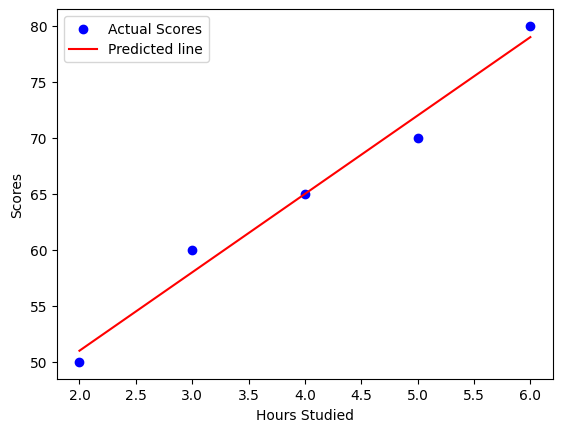

Coefficient (slope): [7.]
Intercept: [37.]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Tạo mô hình Linear Regression
model = LinearRegression()

# Chia dữ liệu thành biến độc lập và phụ thuộc
X = df[['hours_studied']].values
y = df[['scores']].values

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán
predictions = model.predict(X)

# Vẽ đồ thị
plt.scatter(X, y, color="blue", label="Actual Scores")
plt.plot(X, predictions, color="red", label="Predicted line")
plt.xlabel('Hours Studied')
plt.ylabel("Scores")
plt.legend()
plt.show()

print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")